In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
us = pd.read_csv("us_stock.csv", index_col="Date", parse_dates=True)
vn = pd.read_csv("vn_price.csv", index_col="TradingDate", parse_dates=True)

In [3]:
us_diff = us.diff()
vn_diff = vn.diff()

us_return = us.pct_change()
vn_return = vn.pct_change()

us_sign = np.sign(us_diff)
vn_sign = np.sign(vn_diff)

A=\{i|sign_i=1\}
$$\frac{\sum_{k\in A}sign_k}{\sum_{k\in \Omega}|sign_k|}$$

In [4]:
vn_sign

,AAA,AAM,AAT,ABR,ABS,ABT,ACB,ACC,ACG,ACL,...,VPS,VRC,VRE,VSC,VSH,VSI,VTB,VTO,YBM,YEG
TradingDate,,,,,,,,,,,,,,,,,,,,,
2013-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-26,-1.0,1.0,NaN,NaN,NaN,-1.0,-1.0,1.0,NaN,-1.0,...,NaN,-1.0,NaN,-1.0,-1.0,1.0,-1.0,-1.0,NaN,NaN
2013-02-27,0.0,-1.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,0.0,...,NaN,-1.0,NaN,1.0,-1.0,0.0,-1.0,1.0,NaN,NaN
2013-02-28,1.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,1.0,...,NaN,0.0,NaN,1.0,1.0,0.0,1.0,1.0,NaN,NaN
2013-03-01,-1.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,0.0,...,NaN,1.0,NaN,0.0,1.0,0.0,-1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,-1.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,...,-1.0,1.0,0.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0
2023-02-27,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
2023-02-28,-1.0,-1.0,0.0,0.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,-1.0,1.0


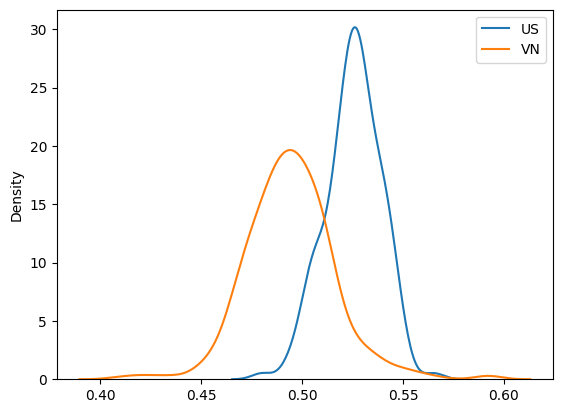

In [5]:
sns.kdeplot(us_sign[us_sign>0].sum()/abs(us_sign).sum(), label="US")
sns.kdeplot(vn_sign[vn_sign>0].sum()/abs(vn_sign).sum(), label="VN")
plt.legend()

A=\{i|return_i>0\}
$$\frac{\sum_{k\in A}return_k}{\sum_{k\in \Omega}|return_k|}$$

In [6]:
vn_return

,AAA,AAM,AAT,ABR,ABS,ABT,ACB,ACC,ACG,ACL,...,VPS,VRC,VRE,VSC,VSH,VSI,VTB,VTO,YBM,YEG
TradingDate,,,,,,,,,,,,,,,,,,,,,
2013-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-26,-0.040350,0.004058,NaN,NaN,NaN,-0.026732,-0.017808,0.011172,NaN,-0.025098,...,NaN,-0.056566,NaN,-0.067702,-0.058754,0.058069,-0.048910,-0.054743,NaN,NaN
2013-02-27,0.000000,-0.008179,NaN,NaN,NaN,0.002512,0.005873,0.000000,NaN,0.000000,...,NaN,-0.039884,NaN,0.022489,-0.008937,0.000000,-0.051131,0.019452,NaN,NaN
2013-02-28,0.013931,0.000000,NaN,NaN,NaN,0.002450,0.000000,0.000000,NaN,0.008582,...,NaN,0.000000,NaN,0.004869,0.018036,0.000000,0.067513,0.018647,NaN,NaN
2013-03-01,-0.006745,0.000000,NaN,NaN,NaN,0.019942,0.006093,0.000000,NaN,0.000000,...,NaN,0.062448,NaN,0.000000,0.017716,0.000000,-0.038004,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,-0.013590,0.000000,0.001969,0.000000,-0.008475,-0.009642,-0.031496,0.014085,-0.028777,0.007968,...,-0.032222,0.058511,0.000000,-0.012739,0.007792,0.000000,0.000000,-0.002439,-0.020134,-0.061947
2023-02-27,-0.001148,0.000000,-0.019646,-0.004785,-0.008547,-0.069541,-0.014228,-0.003472,0.000000,-0.039526,...,0.000000,-0.069347,-0.028302,-0.032258,-0.003866,0.000000,-0.066667,-0.011002,-0.001712,-0.056604
2023-02-28,-0.001149,-0.034632,0.000000,0.000000,-0.013793,0.068759,0.006186,-0.010453,0.022222,-0.004115,...,-0.009185,-0.007559,0.036893,-0.001667,0.001294,0.000000,0.000000,0.000000,-0.063465,0.040000


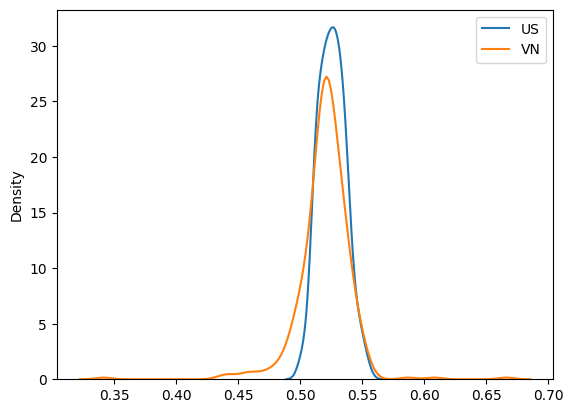

In [7]:
sns.kdeplot(us_return[us_return>0].sum()/abs(us_return).sum(), label="US")
sns.kdeplot(vn_return[vn_return>0].sum()/abs(vn_return).sum(), label="VN")
plt.legend()
plt.show()

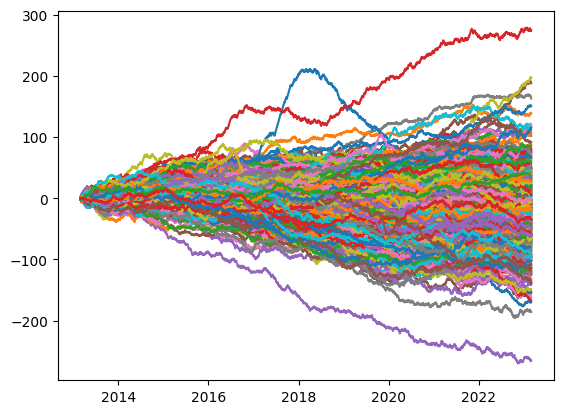

In [8]:
plt.plot(np.cumsum(vn_sign))
plt.show()

### Mô phỏng sự tăng giảm của giá 406 công ty trong 2502 ngày

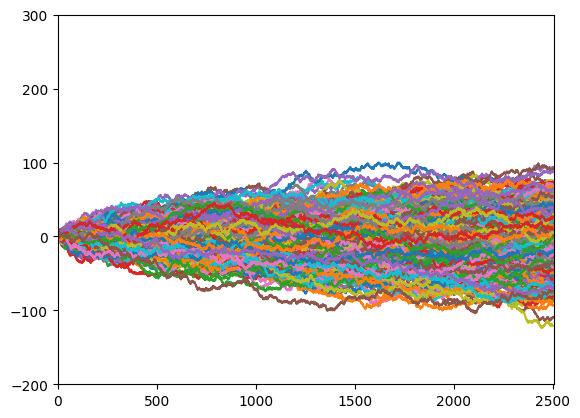

In [9]:
li = np.random.choice([-1, 0, 1], size=(406, 2502))
cumsum = np.cumsum(li, axis=1)

for i in range(406):
    plt.plot(cumsum[i])

plt.axis([0, 2505, -200, 300])
plt.show()

### Cummulative return of 406 company through 2502 days

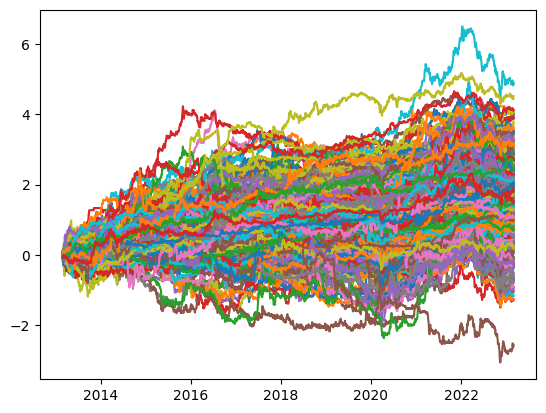

In [10]:
plt.plot(np.cumsum(vn_return))
plt.show()

Phân phối của cummulative return ngày cuối cùng

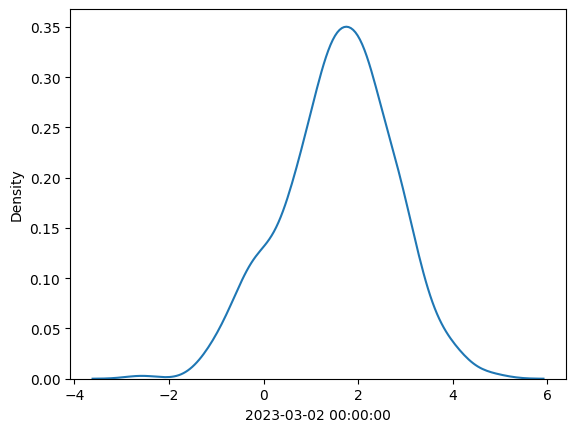

In [11]:
sns.kdeplot(np.cumsum(vn_return).iloc[-1,])
plt.show()

### Phân phối của VN cummulative return trong 25 ngày cuối của data

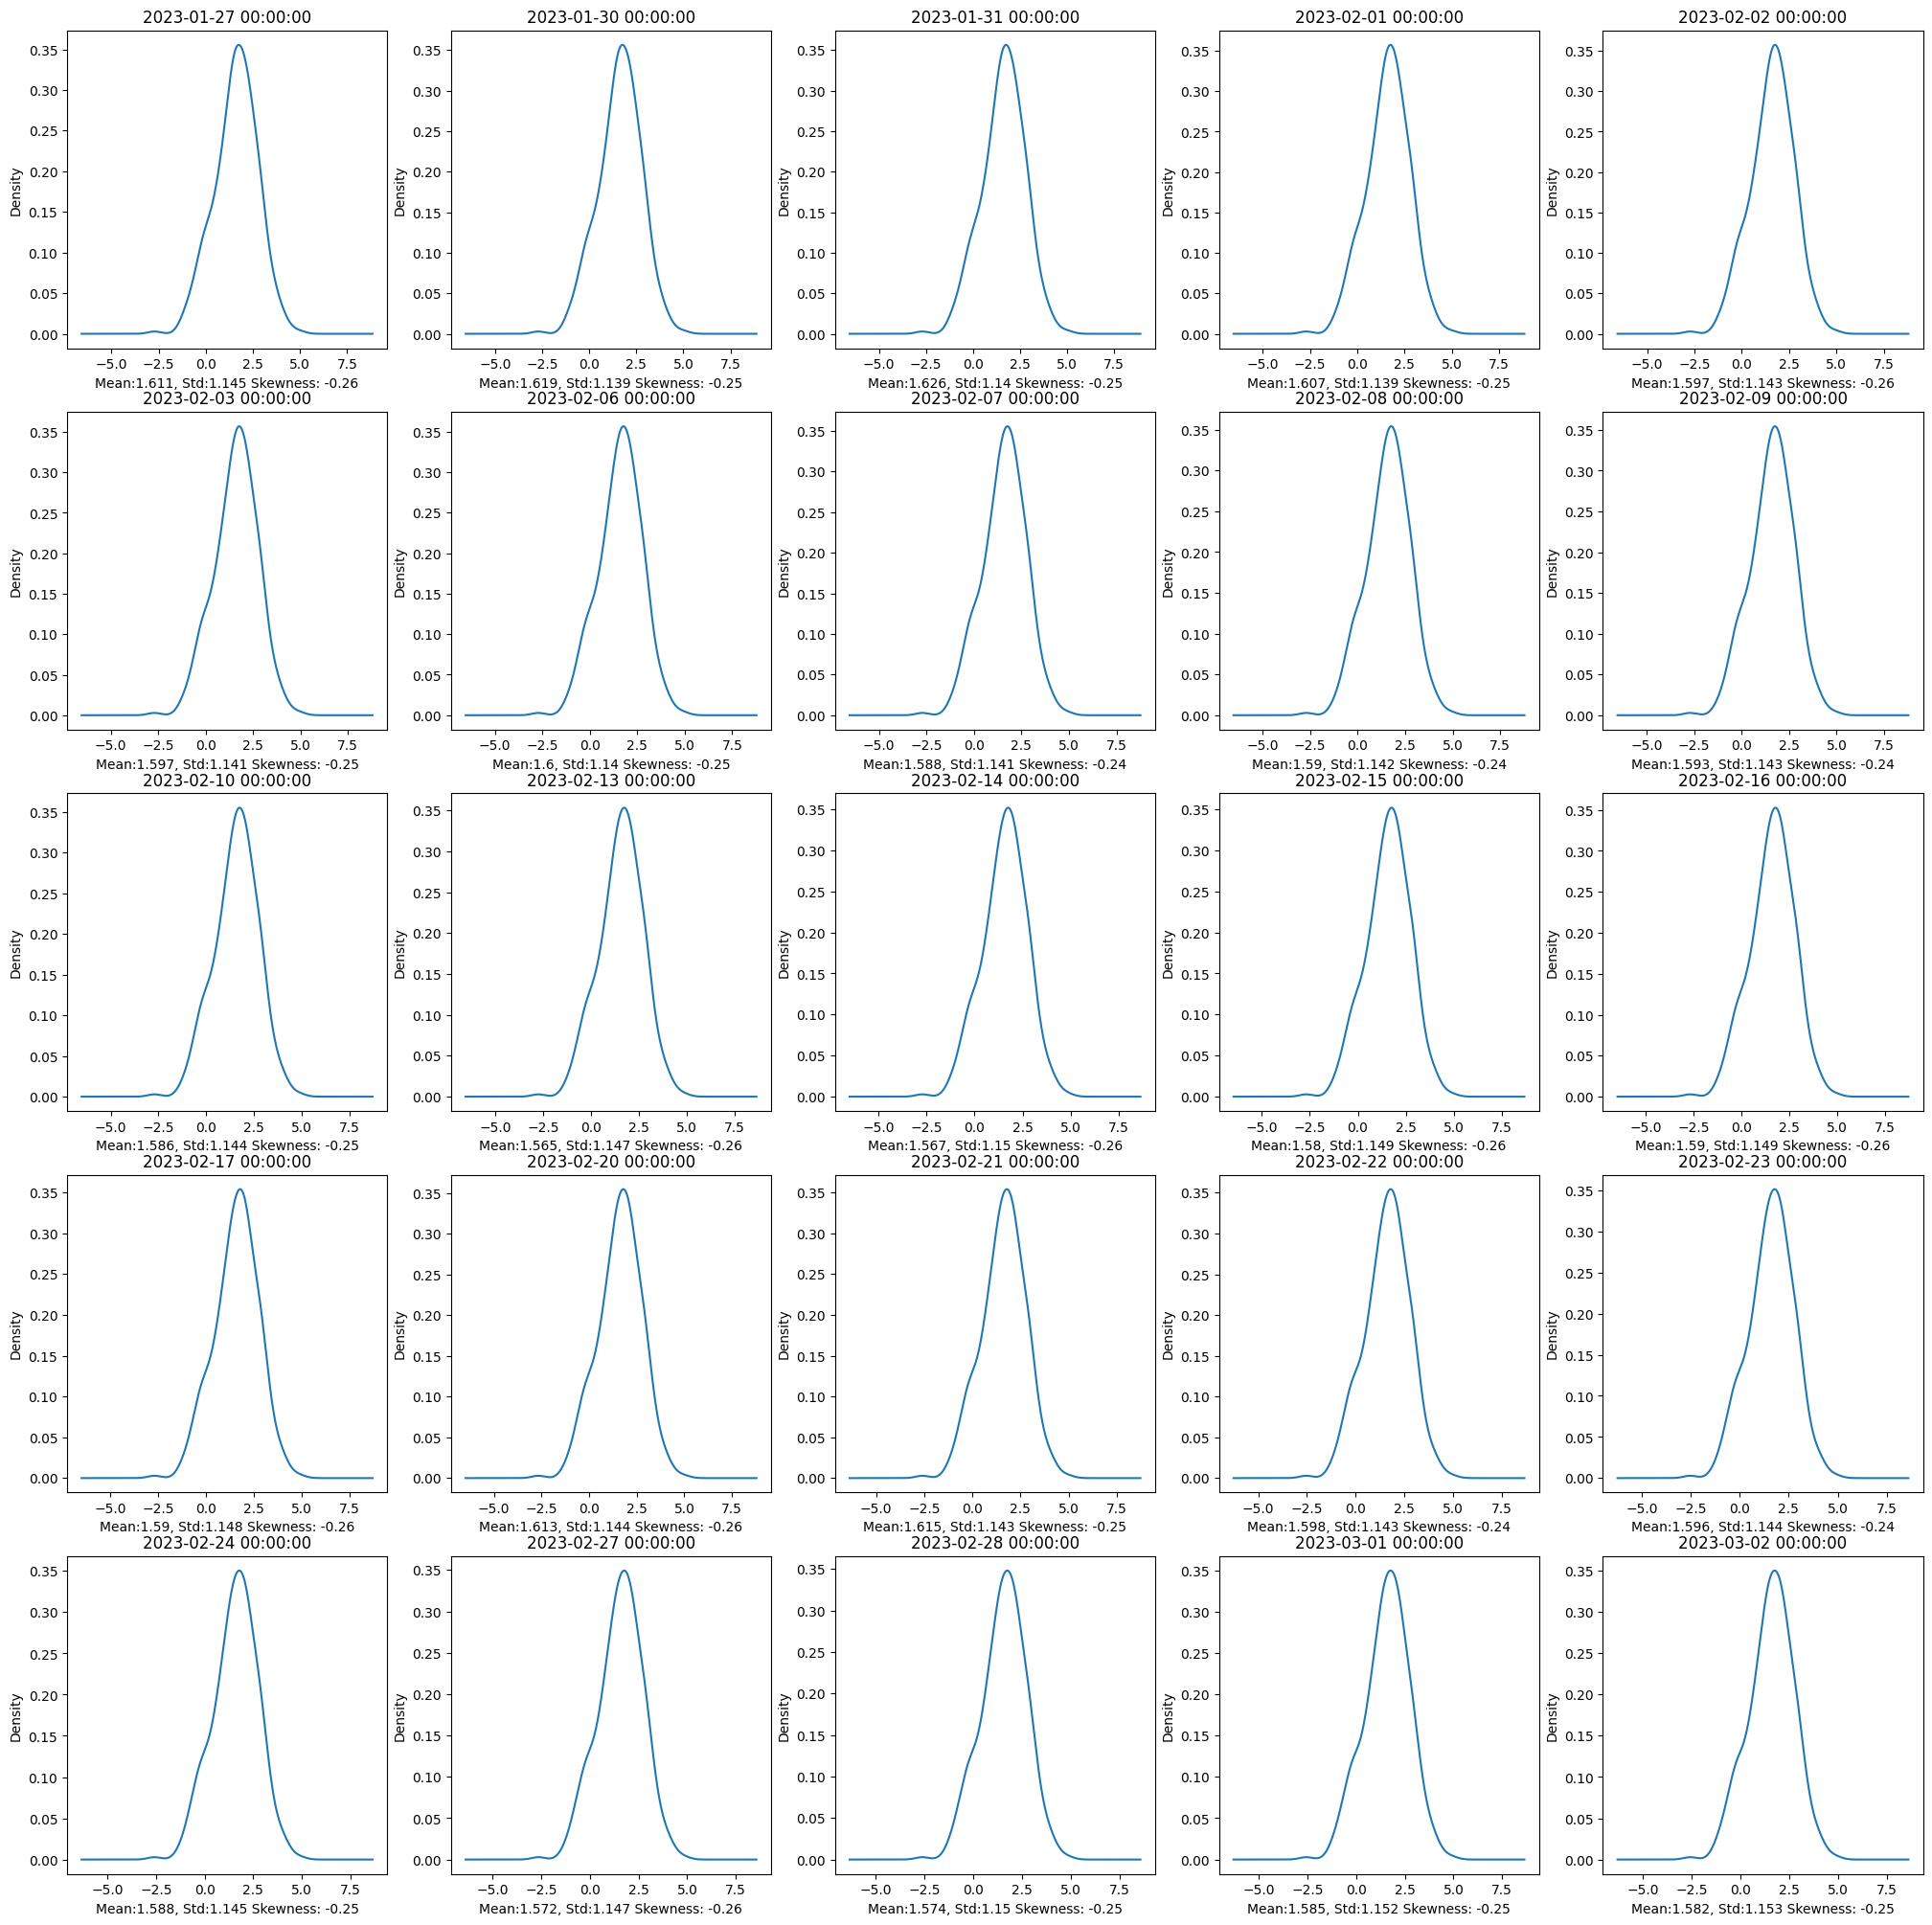

In [12]:
df = np.cumsum(vn_return).iloc[-25:, :]
r =int(np.ceil(np.sqrt(df.shape[0])))
c = int(np.floor(np.sqrt(df.shape[0])))
fig, ax = plt.subplots(r, c,  figsize=(r*c, r*c))

# Plot the histograms
m=0
for row in range(r):
    for col in range(c):
        df.iloc[m].plot.kde(ax=ax[row, col])
        # ax[row, col].hist(df.iloc[m], bins=20)
        ax[row, col].set_title(df.iloc[m].name)
        ax[row,col].set_xlabel(f"Mean:{round(df.iloc[m].mean(),3)}, Std:{round(df.iloc[m].std(),3)} Skewness: {round(df.iloc[m].skew(),2)}")
        m+=1
        

# Display the plot
plt.show()

### Brownian motion stimulation for 406 companies through 2502 days
Cho $\{Y_j\}_{j=1}^n$ là một họ của các biến ngẫu nhiên chuẩn $\mathcal N(0,0.03)$, độc lập xác định trên không gian xác suât $(\Omega,\mathcal F,\mathbb P)$

$$
B_0=0,\\

B_k=\sum^{2502}_{j=1}Y_j\\

X_t = B_t +\frac2{2502}t
$$

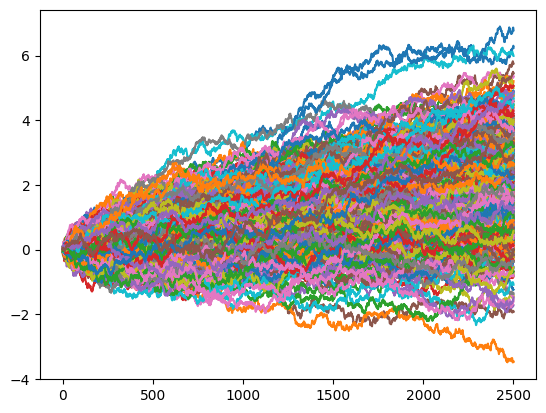

In [13]:
n = []
for i in range(406):
    n.append(np.cumsum(np.random.normal(0,0.03,2502)+2/2502))
df1 = pd.DataFrame(n).T
plt.plot(df1) 
plt.show()    

### Phân phối của mô phỏng $B_k$

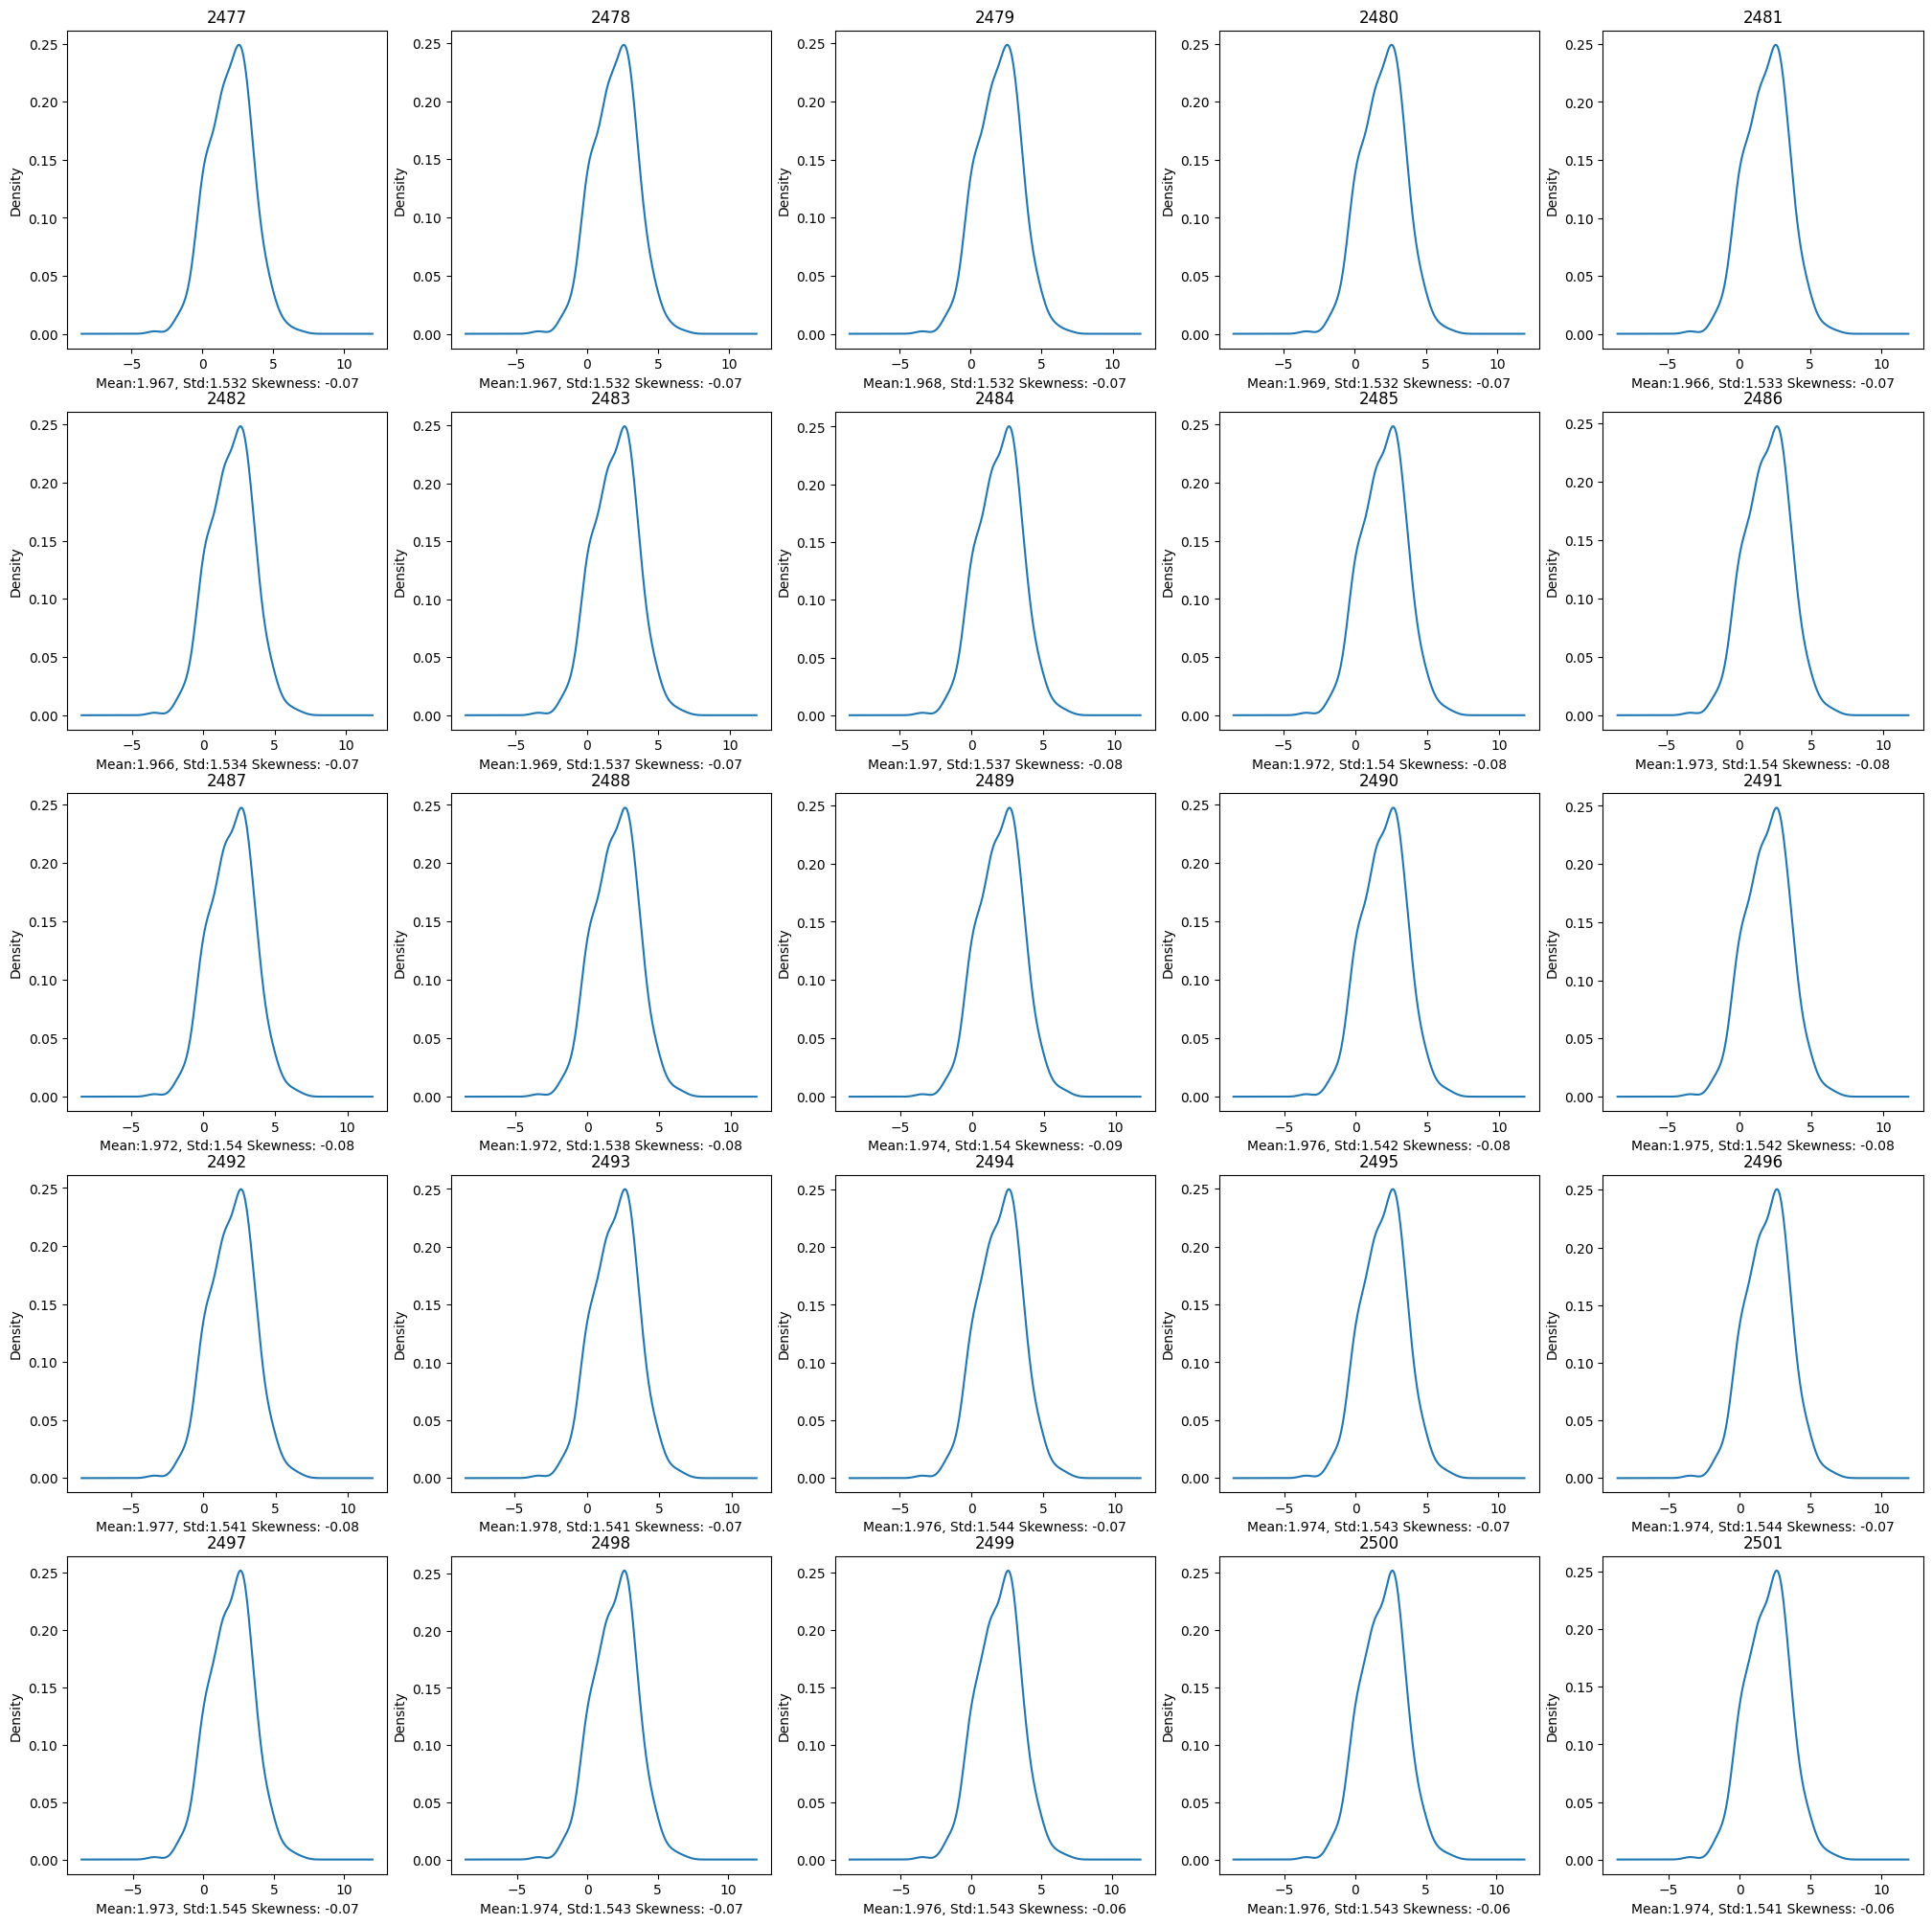

In [14]:
df = df1.iloc[-25:, :]
r =int(np.ceil(np.sqrt(df.shape[0])))
c = int(np.floor(np.sqrt(df.shape[0])))
fig, ax = plt.subplots(r, c,  figsize=(r*c, r*c))

# Plot the histograms
m=0
for row in range(r):
    for col in range(c):
        df.iloc[m].plot.kde(ax=ax[row, col])
        # ax[row, col].hist(df.iloc[m], bins=20)
        ax[row, col].set_title(df.iloc[m].name)
        ax[row,col].set_xlabel(f"Mean:{round(df.iloc[m].mean(),3)}, Std:{round(df.iloc[m].std(),3)} Skewness: {round(df.iloc[m].skew(),2)}")
        m+=1
        

# Display the plot
plt.show()


## Mỹ

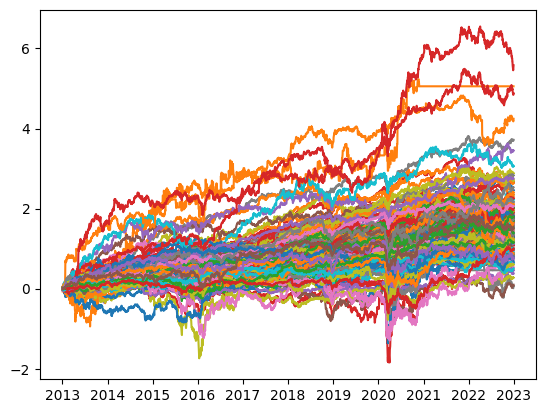

In [15]:
plt.plot(np.cumsum(us_return))
plt.show()

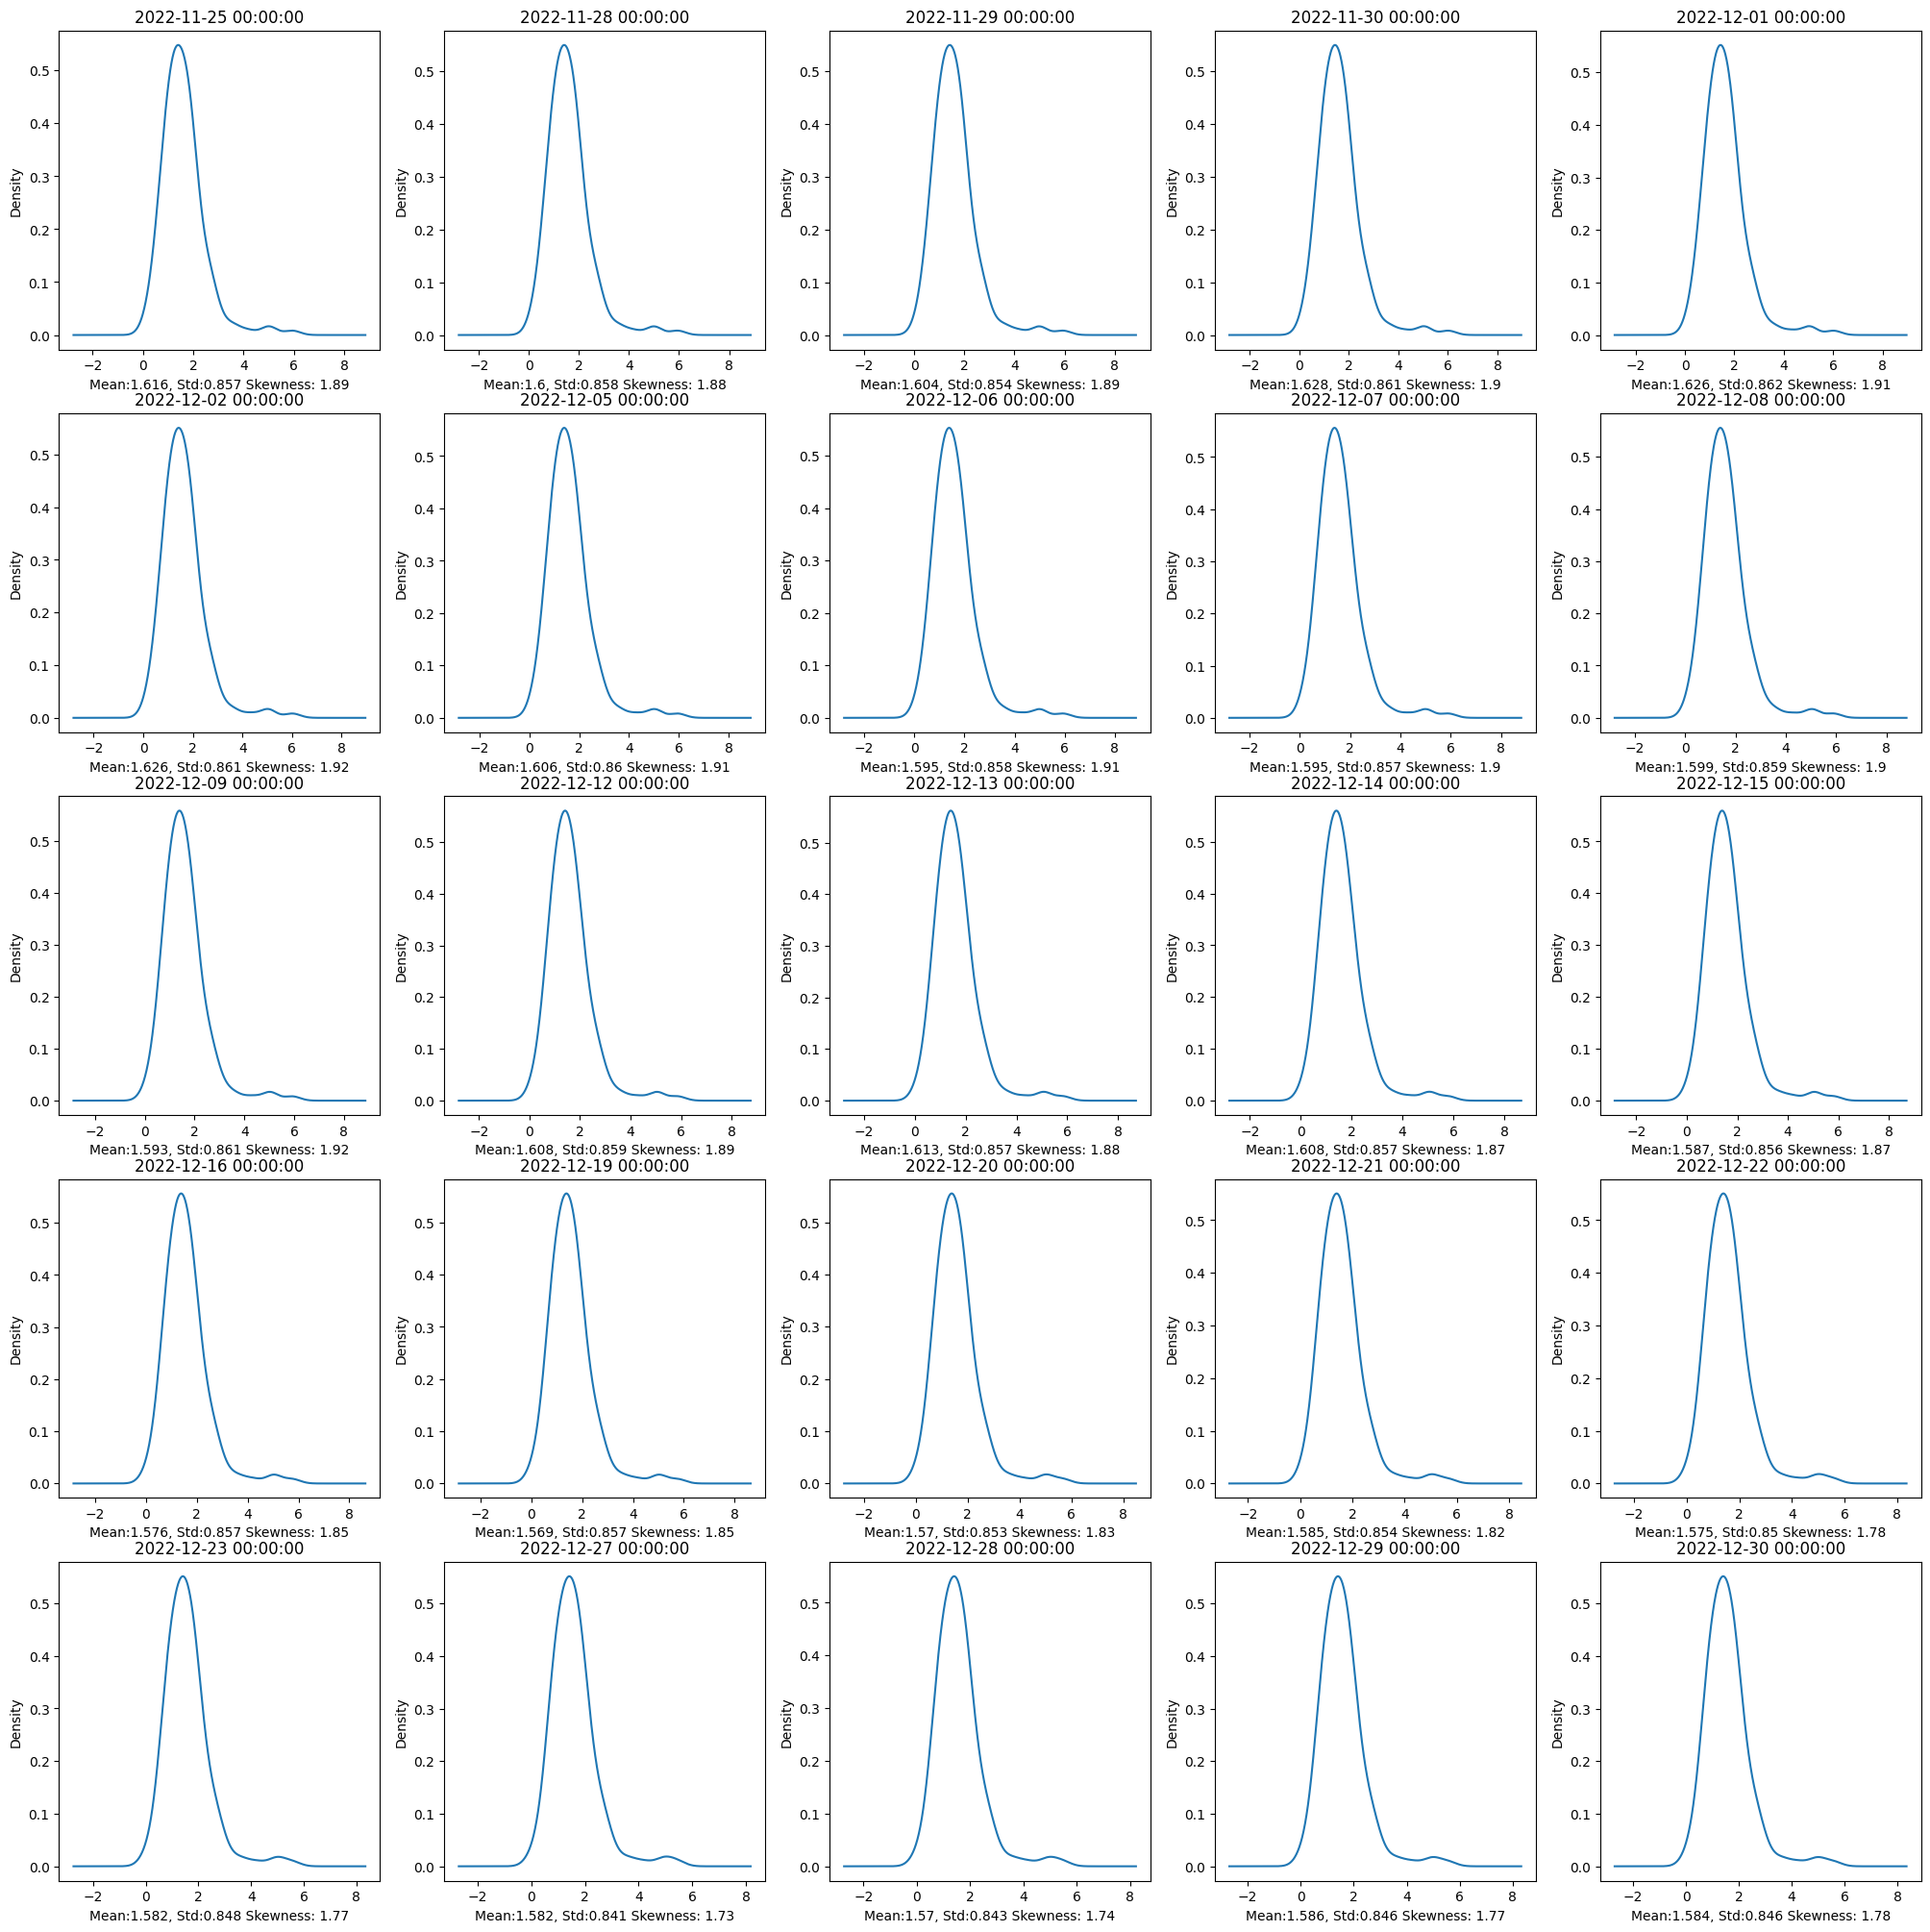

In [18]:
df = np.cumsum(us_return).iloc[-25:, :]
r =int(np.ceil(np.sqrt(df.shape[0])))
c = int(np.floor(np.sqrt(df.shape[0])))
fig, ax = plt.subplots(r, c,  figsize=(r*c, r*c))

# Plot the histograms
m=0
for row in range(r):
    for col in range(c):
        df.iloc[m].plot.kde(ax=ax[row, col])
        # ax[row, col].hist(df.iloc[m], bins=20)
        ax[row, col].set_title(df.iloc[m].name)
        ax[row,col].set_xlabel(f"Mean:{round(df.iloc[m].mean(),3)}, Std:{round(df.iloc[m].std(),3)} Skewness: {round(df.iloc[m].skew(),2)}")
        m+=1
        

# Display the plot
plt.show()

### Brownian motion stimulation for 176 companies through 2518 days
Cho $\{Y_j\}_{j=1}^n$ là một họ của các biến ngẫu nhiên chuẩn $\mathcal N(0,0.02)$, độc lập xác định trên không gian xác suât $(\Omega,\mathcal F,\mathbb P)$

$$
B_0=0,\\

B_k=\sum^{2502}_{j=1}Y_j\\

X_t=B_t+\frac2{1250}t
$$



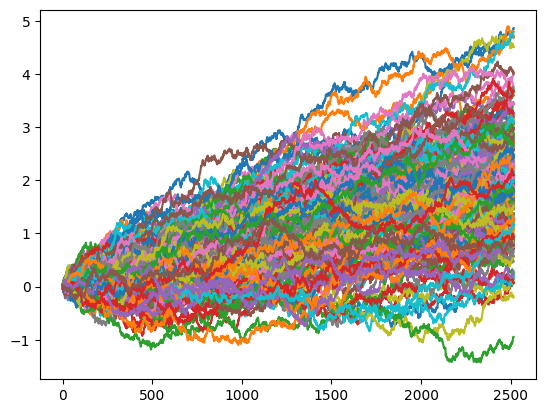

In [17]:
for i in range(176):
    plt.plot(np.cumsum(np.random.normal(0,0.02,2518)+2/2518))